# Logistic Regression Implementation from Scratch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1a177pIL4O3P27C51p0KL309U3yGLdyge)

## Project Overview

Implementation of binary logistic regression algorithm from scratch using gradient descent optimization for CIFAR-10 airplane classification. This project demonstrates fundamental machine learning concepts including sigmoid activation, binary cross-entropy loss, and gradient-based parameter optimization without using high-level ML libraries.

## Contributors
- Abolfazl Ranjbar - [GitHub](https://github.com/ImRanjbar)
- Miaad Kimiagari - [GitHub](https://github.com/Miaad2004)
- Taha Najaf - [GitHub](https://github.com/taha-najaf)

## Objectives

- Implement logistic regression algorithm using pure NumPy
- Apply binary classification to CIFAR-10 dataset (airplane vs. non-airplane)
- Demonstrate gradient descent optimization from first principles
- Evaluate model performance using confusion matrix and F1-score metrics
- Visualize prediction results and model behavior

## Technical Approach

**Algorithm**: Binary Logistic Regression with Sigmoid Activation  
**Optimization**: Gradient Descent with Fixed Learning Rate  
**Loss Function**: Binary Cross-Entropy  
**Dataset**: CIFAR-10 (Binary Classification: Airplane Detection)  
**Implementation**: Pure NumPy (No Scikit-learn for Core Algorithm)

## Dataset Preparation and Preprocessing

Loading CIFAR-10 dataset and converting the multi-class problem into binary classification (airplane vs. non-airplane). The preprocessing includes normalization, flattening of image data, and binary label encoding for logistic regression compatibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.utils import to_categorical


# CIFAR
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# preprocess
y_train_bin = (y_train == 0).astype(int)
y_test_bin = (y_test == 0).astype(int)

# normalize and flatten
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Algorithm Implementation

Core logistic regression components including sigmoid activation function, binary cross-entropy loss computation, and parameter initialization. The implementation follows mathematical foundations of logistic regression with numerical stability considerations.

In [2]:
# init weights and bias
np.random.seed(0)
W = np.random.randn(x_train_flat.shape[1]) * 0.01
b = 0.0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # for numerical stability
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


## Model Training Process

Gradient descent optimization implementation with iterative parameter updates. The training loop computes forward pass predictions, calculates loss gradients, and updates weights and bias using backpropagation principles.

In [3]:
from tqdm.notebook import trange
import numpy as np

# Training loop
lr = 0.02
epochs = 500

progress = trange(epochs, desc="Training")

for epoch in progress:
    z = np.dot(x_train_flat, W) + b
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y_train_bin, y_pred)

    # grads
    dz = y_pred - y_train_bin
    dW = np.dot(x_train_flat.T, dz) / len(x_train_flat)
    db = np.mean(dz)

    # update params
    W -= lr * dW
    b -= lr * db

    progress.set_postfix({"loss": f"{loss:.4f}"})


Training:   0%|          | 0/500 [00:00<?, ?it/s]

## Performance Evaluation and Analysis

Comprehensive model evaluation including test set performance assessment, confusion matrix analysis, and prediction visualization. The evaluation demonstrates the effectiveness of the from-scratch logistic regression implementation on image classification tasks.

Test Loss: 2.2404
Confusion Matrix:
[[8886  114]
 [ 859  141]]

F1 Score: 0.22470119521912352
Accuracy: 0.9027


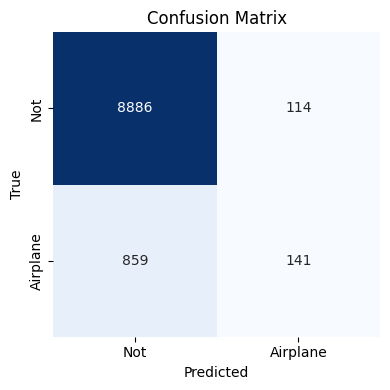

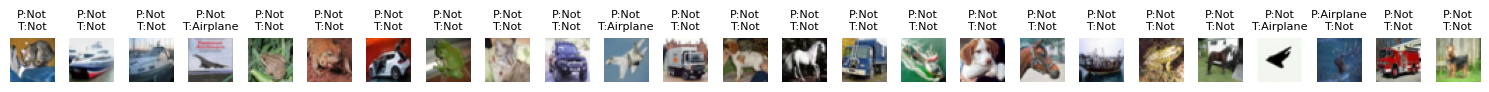

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Evaluation
test_logits = np.dot(x_test_flat, W) + b
test_probs = sigmoid(test_logits)
test_preds = test_probs >= 0.5

test_loss = binary_cross_entropy(y_test_bin, test_preds)
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
y_test_class = test_preds.astype(int)
cm = confusion_matrix(y_test_bin, y_test_class)
f1 = f1_score(y_test_bin, y_test_class)
acc = accuracy_score(y_test_bin, y_test_class)

print("Confusion Matrix:")
print(cm)
print("\nF1 Score:", f1)
print("Accuracy:", acc)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not", "Airplane"], yticklabels=["Not", "Airplane"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Show 25 predictions from test set
fig, axes = plt.subplots(1, 25, figsize=(15, 2))
for i in range(25):
    axes[i].imshow(x_test[i])
    pred = "Airplane" if y_test_class[i] == 1 else "Not"
    true = "Airplane" if y_test_bin[i] == 1 else "Not"
    axes[i].set_title(f"P:{pred}\nT:{true}", fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
